In [20]:
#EDA HOME CREDIT EXAM

In [24]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
from collections import Counter
sns.set(style = 'darkgrid')

In [62]:
# bikin function shortcut untuk EDA
def central_tendency(column) :
    data = {}
    data['Column'] = column.name
    data['Mean'] = st.mean(column)
    data['Mode'] = Counter(column).most_common()[0][0]
    data['Median'] = st.median(column)
    return pd.DataFrame([data])

def dispersion(column):
    data = {}
    data['Column'] = column.name
    data['Variance'] = st.variance(column)
    data['Standard Deviation'] = st.stdev(column)
    data['Skew'] = column.skew()
    return pd.DataFrame([data])

def plot_distribution(column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize = (10, 6),gridspec_kw ={"height_ratios": {0.2, 1}})
    info = central_tendency(column)
    mean = info['Mean'].values[0]
    median = info['Median'].values[0]
    mode = info['Mode'].values[0]

    sns.boxplot(x=column, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle=':')
    ax_box.axvline(mode, color='b', linestyle='-')
    ax_box.set(xlabel='')

    sns.histplot(x=column, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle=':')
    ax_hist.axvline(mode, color='b', linestyle='-')

    plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
    plt.show()

def find_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  outliers = []

  for data in column:
    if (data > (Q3 + 1.5 * IQR)) | (data < (Q1 - 1.5 * IQR)):
      outliers.append(data)

  return outliers

In [26]:
# read csv file application_train.csv
data = pd.read_csv(r'/Users/owen/Desktop/application_train.csv')
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Datanya mempunyai banyak value NaN
data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [28]:
# kita akan drop rows yang mempunyai Nan Values
df = data.dropna()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [29]:
# shape sebelum dan sesudah Nan values dihapus
print('data sebelum di hapus = ',data.shape)
print('data sesudah NaN values dihapus = ',df.shape)
# untuk best practice kita akan pakai dataframe yang informasinya sudah lengkap

data sebelum di hapus =  (307511, 122)
data sesudah NaN values dihapus =  (8602, 122)


In [33]:
# soal 1
# Tarik insight untuk feature 'AMT_INCOME_TOTAL', 'AMT_CREDIT'
amt_income = df['AMT_INCOME_TOTAL']
amt_credit = df['AMT_CREDIT']

In [34]:
# soal 1.1 (central tendency)
pd.concat([central_tendency(amt_income), central_tendency(amt_credit)], ignore_index=True)

,Column,Mean,Mode,Median
0,AMT_INCOME_TOTAL,222872.414439,225000.0,193500.0
1,AMT_CREDIT,699998.701639,450000.0,585000.0


In [39]:
# Central tendency for AMT_INCOME_TOTAL
# Quantile analysis
lowQ = amt_income.quantile(0.25)
midQ = amt_income.quantile(0.50)
upperQ = amt_income.quantile(0.75)
iqr = upperQ - lowQ
lowW = lowQ - 1.5*iqr
upperW = upperQ + 1.5*iqr
print(f'Nilai tengah dari feature AMT_INCOME_TOTAL adalah {midQ}')
print(f'Nilai bawah dari feature AMT_INCOME_TOTAL adalah {lowQ}')
print(f'Nilai atas dari feature AMT_INCOME_TOTAL adalah {upperQ}')
print(f'Dengan Low Whisker {lowW} dan upper whisker {upperW}')
# Outlier isolation
# dari outlier isolation kita bisa lihat bahwa feature AMT_INCOME_TOTAL mempunyai banyak outlier
outliers = df[(amt_income > upperW) | (amt_income < lowW)]['AMT_INCOME_TOTAL']
outliers

Nilai tengah dari feature AMT_INCOME_TOTAL adalah 193500.0
Nilai bawah dari feature AMT_INCOME_TOTAL adalah 135000.0
Nilai atas dari feature AMT_INCOME_TOTAL adalah 270000.0
Dengan Low Whisker -67500.0 dan upper whisker 472500.0


701        540000.0
1049       522000.0
1238       810000.0
1942       540000.0
3209       810000.0
            ...    
304283     495000.0
305746     540000.0
306028    1350000.0
306179     949500.0
306882     517500.0
Name: AMT_INCOME_TOTAL, Length: 294, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

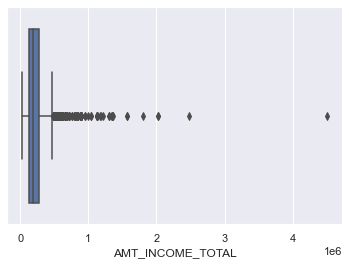

In [46]:
# dari boxplotnya kita bisa visualisasi jumlah outlier di feature AMT_INCOME_TOTAL
# Sehingga menentukan titik pusat data lebih tepat menggunakan median
sns.boxplot(amt_income)

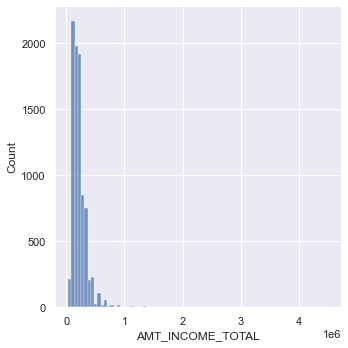

In [50]:
sns.displot(amt_income,bins = 80)
# dari result histogram kita bisa lihat data mempunyai right skewdness

In [51]:
# Central tendency for AMT_CREDIT
# Quantile analysis
lowQ = amt_credit.quantile(0.25)
midQ = amt_credit.quantile(0.50)
upperQ = amt_credit.quantile(0.75)
iqr = upperQ - lowQ
lowW = lowQ - 1.5*iqr
upperW = upperQ + 1.5*iqr
print(f'Nilai tengah dari feature AMT_CREDIT adalah {midQ}')
print(f'Nilai bawah dari feature AMT_CREDIT adalah {lowQ}')
print(f'Nilai atas dari feature AMT_CREDIT adalah {upperQ}')
print(f'Dengan Low Whisker {lowW} dan upper whisker {upperW}')
# Outlier isolation
# jumlah outlier di feature AMT_CREDIT juga banyak
outliers = df[(amt_credit > upperW) | (amt_credit < lowW)]['AMT_CREDIT']
outliers

Nilai tengah dari feature AMT_CREDIT adalah 585000.0
Nilai bawah dari feature AMT_CREDIT adalah 315000.0
Nilai atas dari feature AMT_CREDIT adalah 958144.5
Dengan Low Whisker -649716.75 dan upper whisker 1922861.25


337       1971072.0
441       1971072.0
1566      1965226.5
3656      1928304.0
7061      2695500.0
            ...    
300572    2025000.0
301841    1971072.0
303430    2064186.0
305307    2410380.0
306882    2250000.0
Name: AMT_CREDIT, Length: 191, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

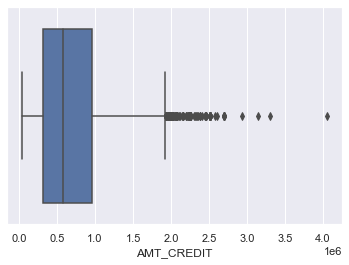

In [53]:
# dari boxplotnya kita bisa visualisasi jumlah outlier di feature AMT_CREDIT
# Sehingga menentukan titik pusat data lebih tepat menggunakan median
sns.boxplot(amt_credit)

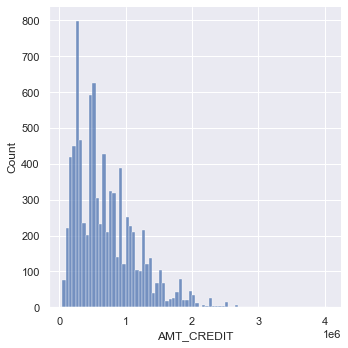

In [55]:
sns.displot(amt_credit,bins = 80)
# dari result histogram kita bisa lihat data mempunyai right skewdness

In [63]:
# soal 1.2 (dispersion)
pd.concat([dispersion(amt_income), dispersion(amt_credit)], ignore_index=True)

,Column,Variance,Standard Deviation,Skew
0,AMT_INCOME_TOTAL,1.999973e+10,141420.411520,6.516565
1,AMT_CREDIT,2.161430e+11,464911.858971,1.153629


In [64]:
mean_income = amt_income.mean()
mean_credit = amt_credit.mean()
print(f'Nilai tengah dari feature AMT_INCOME_TOTAL adalah {mean_income}')
print(f'Nilai tengah dari feature AMT_CREDIT adalah {mean_credit}')
# kita bisa lihat bahwa standard deviation untuk income dan credit lebih rendah dari nilai tengahnya
# ini berarti range datanya sangat bervariasi. banyak orang yang mempunyai situasi yang berbeda

Nilai tengah dari feature AMT_INCOME_TOTAL adalah 222872.41443850266
Nilai tengah dari feature AMT_CREDIT adalah 699998.7016391536


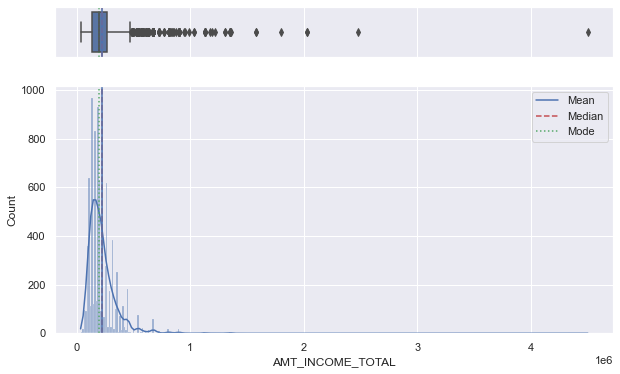

In [66]:
# soal 1.3 (distribution) AMT_INCOME_TOTAL
plot_distribution(amt_income)
# seperti di soal 1.1 kita bisa lihat bahwa range outlier ( orang yang mempunyai uang diatas standar ) sangat banyak
# data yang lebih akurat untuk mengambarkan distribusi income adalah medianya

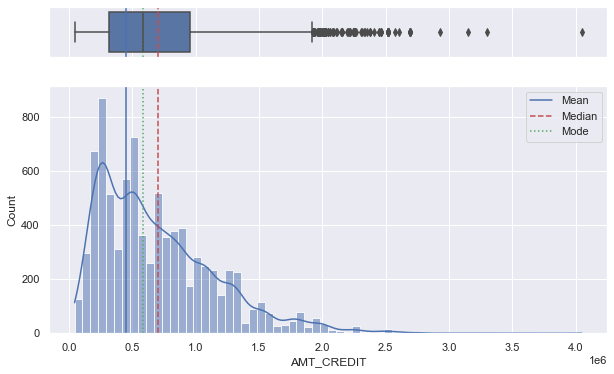

In [65]:
# soal 1.3 (distribution) AMT_CREDIT
plot_distribution(amt_credit)
# kita bisa lihat graph masih mempunyai right skewedness berarti banyak credit orang adalah di range rendah dari sudut pandang distribusi

In [67]:
# soal 2
# isolasi data DAYS_EMPLOYED
days_emp = df['DAYS_EMPLOYED']

In [70]:
days_emp.describe()

count     8602.000000
mean     -2299.091374
std       2077.178768
min     -14375.000000
25%      -3132.500000
50%      -1680.500000
75%       -817.000000
max         -4.000000
Name: DAYS_EMPLOYED, dtype: float64

In [69]:
dispersion(days_emp).transpose()
# kita bisa lihat variance data tidak natural dan sangat tinggi

,0
Column,DAYS_EMPLOYED
Variance,4314671.633319
Standard Deviation,2077.178768
Skew,-1.76916


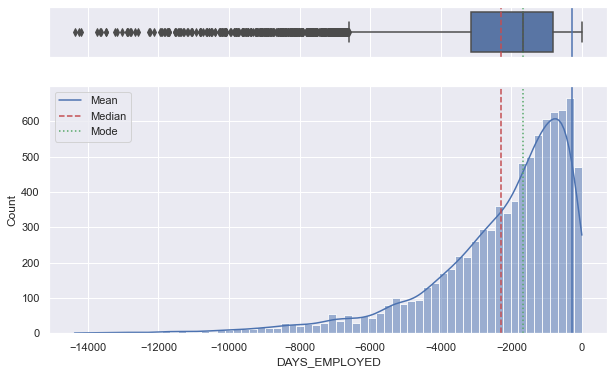

In [79]:
plot_distribution(days_emp)
# kits bisa lihat bahwa datanya left skewed dan mempunyai banyak outlier di range bawah

In [75]:
# listing jumlah outliers
outliers = find_outliers(days_emp)
outliers

[-7115,
 -7514,
 -11534,
 -8478,
 -10624,
 -7319,
 -8845,
 -6606,
 -7044,
 -8150,
 -8268,
 -9938,
 -12241,
 -8657,
 -7562,
 -9622,
 -7048,
 -11696,
 -6709,
 -8412,
 -8727,
 -8495,
 -9363,
 -7047,
 -12886,
 -12659,
 -6716,
 -6644,
 -6943,
 -8385,
 -9372,
 -10096,
 -8148,
 -8178,
 -8631,
 -9731,
 -7018,
 -8812,
 -13179,
 -6961,
 -7198,
 -7376,
 -7061,
 -8387,
 -6908,
 -8908,
 -10501,
 -7632,
 -8238,
 -7943,
 -8614,
 -7699,
 -6749,
 -9010,
 -11058,
 -11812,
 -9131,
 -8542,
 -7825,
 -9190,
 -7728,
 -7773,
 -8488,
 -7321,
 -8029,
 -8202,
 -8063,
 -8257,
 -8508,
 -10393,
 -9510,
 -9814,
 -8276,
 -9236,
 -8557,
 -6767,
 -13637,
 -8109,
 -7968,
 -8403,
 -9473,
 -6892,
 -7135,
 -9595,
 -9221,
 -14375,
 -8854,
 -6724,
 -7740,
 -8947,
 -7098,
 -8931,
 -9799,
 -6729,
 -6727,
 -6990,
 -7306,
 -8423,
 -9975,
 -12260,
 -7017,
 -11721,
 -8892,
 -9385,
 -8030,
 -8046,
 -7139,
 -6972,
 -7272,
 -8234,
 -7526,
 -8275,
 -11413,
 -9521,
 -6914,
 -7341,
 -7783,
 -9083,
 -11361,
 -8138,
 -8303,
 -7050,
 -7585

In [76]:
# kita akan menghapus outliers dan melihat shape data yang baru
days_emp_clean = df[~df['DAYS_EMPLOYED'].isin(outliers)]
print('Before removing outliers:', df.shape)
print('After removing outliers:', days_emp_clean.shape)

Before removing outliers: (8602, 122)
After removing outliers: (8174, 122)


In [77]:
# sekarang variancenya mempunyai value yang normal
dispersion(days_emp_clean['DAYS_EMPLOYED'])

,Column,Variance,Standard Deviation,Skew
0,DAYS_EMPLOYED,2.251894e+06,1500.631042,-0.929688


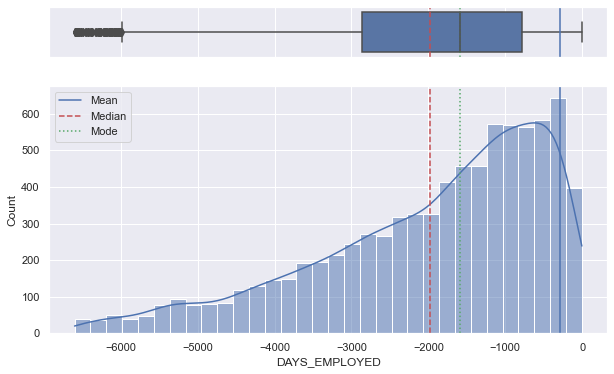

In [78]:
# datanya masih left skewed tetapi distribusinya lebih normal
plot_distribution(days_emp_clean['DAYS_EMPLOYED'])

In [131]:
# soal 3
# Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column NAME_EDUCATION_TYPE. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!
# isolasi column NAME_EDUCATION_TYPE
name_edu = pd.DataFrame(df['NAME_EDUCATION_TYPE'],columns = ['NAME_EDUCATION_TYPE'])
name_edu.value_counts()


NAME_EDUCATION_TYPE          
Secondary / secondary special    4646
Higher education                 3523
Incomplete higher                 392
Lower secondary                    35
Academic degree                     6
dtype: int64

<AxesSubplot:>

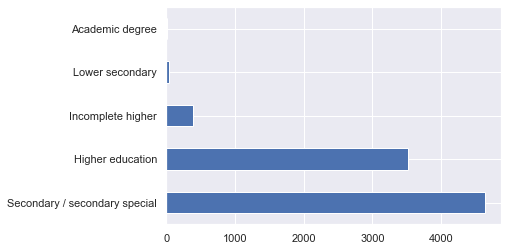

In [132]:
df.NAME_EDUCATION_TYPE.value_counts().plot(kind = 'barh')
# dari distribusi kita bisa lihat bahwa kebanyakan orang mempunyai Secondary/secondary special 

In [120]:
# soal 4 
# Buatlah plot yang tepat mengenai kelompok umur yang gagal melakukan pembayaran. Untuk umur bisa menggunakan variabel DAYS_BIRTH dan identifier apakah orang tersebut gagal melakukan pembayaran adalah TARGET. Kelompok umur adalah tiap 5 tahun. Ex : 20-25 tahun, 26-30 tahun, etc. Jelaskan (insight) dari plot yang Anda buat!
data[['DAYS_BIRTH']].describe()

,DAYS_BIRTH
count,307511.000000
mean,-16036.995067
std,4363.988632
min,-25229.000000
25%,-19682.000000
50%,-15750.000000
75%,-12413.000000
max,-7489.000000


In [134]:
# isolasi data 'DAYS_BIRTH'
days_birth = df['DAYS_BIRTH']

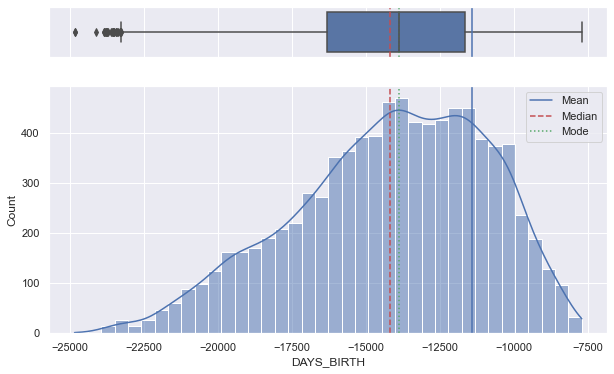

In [138]:
plot_distribution(days_birth)

In [140]:
# bikin age column baru untuk convert days birth ke age
df['age'] = df['DAYS_BIRTH'] / 365 * -1

<ipython-input-140-64fa215be393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['DAYS_BIRTH'] / 365 * -1


In [141]:
# function untuk arrange age range
def age_buckets(x): 
    if 20 < x < 25: 
        return '20-25' 
    elif 25 < x < 30: 
        return '25-30' 
    elif 30 < x < 35: 
        return '30-35' 
    elif 35 < x < 40: 
        return '35-40' 
    elif 40 < x < 45: 
        return '40-45' 
    elif 45 < x < 50: 
        return '45-50'
    elif 50 < x < 55:
        return '50-55'
    elif 55 < x < 60:
        return '55-60'
    elif 60 < x < 65:
        return '60-65'
    elif 65 < x < 70 :
        return '65-70'
    else: 
        return 'other'

In [142]:
# apply function ke column baru
df['agerange'] = df['age'].apply(age_buckets)

<ipython-input-142-8d517b5d6bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agerange'] = df['age'].apply(age_buckets)


In [143]:
df['TARGET'].head()

71     0
124    0
152    0
161    0
255    1
Name: TARGET, dtype: int64

In [144]:
def target_result(x):
    if x == 1:
        return 'Yes'
    if x == 0:
        return 'No'
df['targets'] = df['TARGET'].apply(target_result)

<ipython-input-144-870236fd507b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['targets'] = df['TARGET'].apply(target_result)


<AxesSubplot:xlabel='agerange', ylabel='Count'>

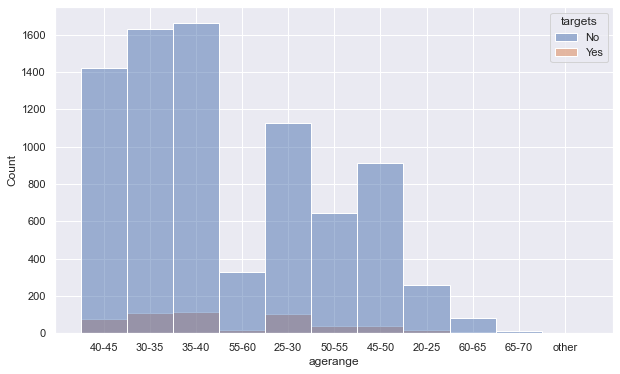

In [145]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'agerange', hue = 'targets')
# dari plot di bawah kita bisa lihat bahwa banyak orang tidak bisa membayar sesuai target
# age group yang bisa membayar standar berumur produktif 25 - 40
# age group yang mempunyai ratio yes/no terbaik adalah age group 25 - 30

In [152]:
# soal 5
# Di antara NAME_INCOME_TYPE, DAYS_BIRTH, & NAME_EDUCATION_TYPE, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column TARGET? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

# setting matrices
cols = df[['NAME_INCOME_TYPE', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE','TARGET']]

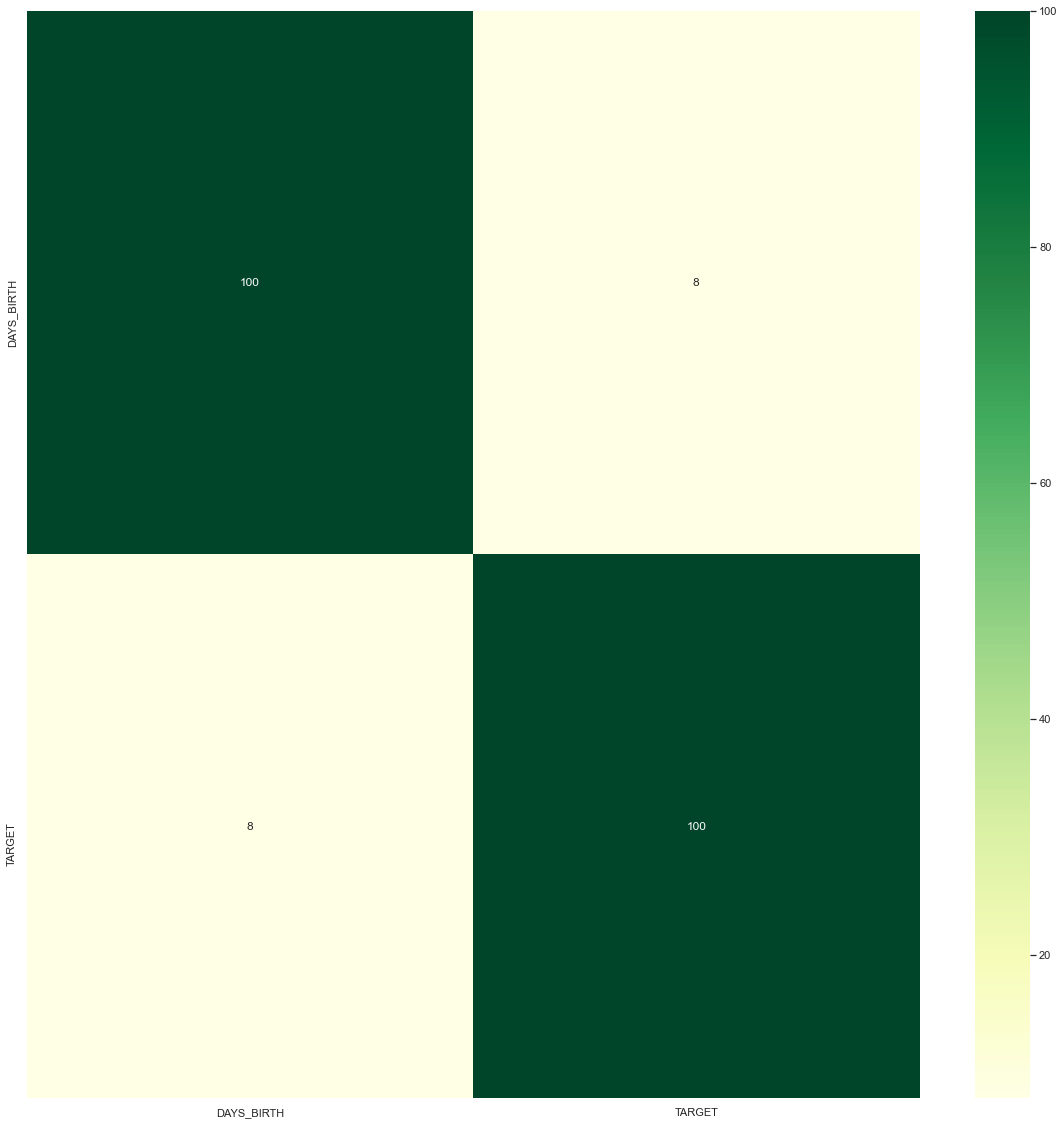

In [159]:
# heatmap
plt.figure(figsize=(20, 20))
corr = cols.corr(method = 'spearman')
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

In [ ]:
# soal 6
# Temukan NAME_INCOME_TYPE yang rata-rata income (AMT_INCOME_TOTAL) paling tinggi, serta tampilkan NAME_INCOME_TYPE dan rata-rata salary dalam bentuk Barplot! Lalu carilah:
# Tiga NAME_EDUCATION_TYPE yang memiliki rata-rata salary tertinggi!
# Lima tipe pekerjaan (OCCUPATION_TYPE) yang memiliki rata-rata salary tertinggi! 
# Tiga status perkawinan (NAME_FAMILY_STATUS) yang paling sering dilakukan!

In [160]:
# dataframe income type dan rata rata income total
top_income = df.groupby('NAME_INCOME_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()
top_income = top_income.sort_values(by='AMT_INCOME_TOTAL', ascending=False)
top_income

,NAME_INCOME_TYPE,AMT_INCOME_TOTAL
0,Commercial associate,258114.943054
1,State servant,217968.234637
2,Working,203776.093960


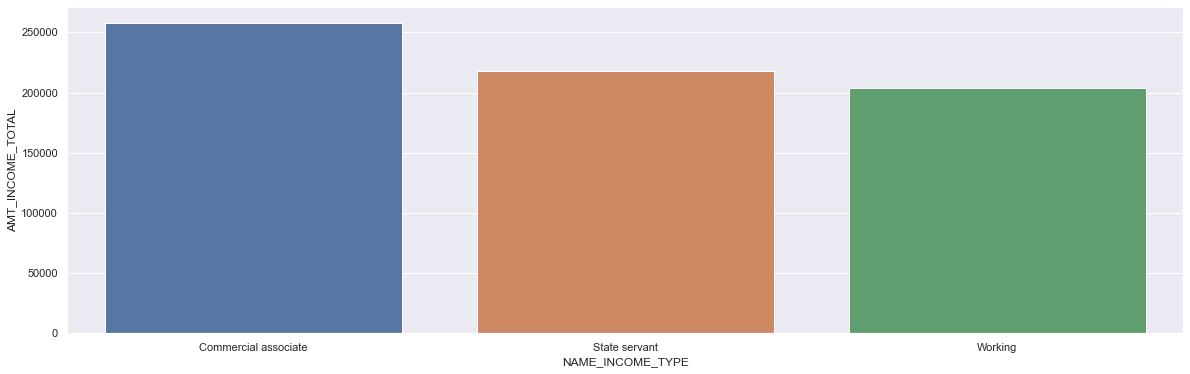

In [161]:
#  kita bisa lihat bahwa commercial associate mempunyai income tertinggi
plt.figure(figsize = (20,6))
sns.barplot(data = top_income, x = 'NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL')
plt.show()

In [162]:
top_education = df.groupby('NAME_EDUCATION_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()
top_education = top_education.sort_values(by='AMT_INCOME_TOTAL', ascending=False).head(3)
top_education

,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,Academic degree,392250.000000
1,Higher education,258033.351689
2,Incomplete higher,227106.711735


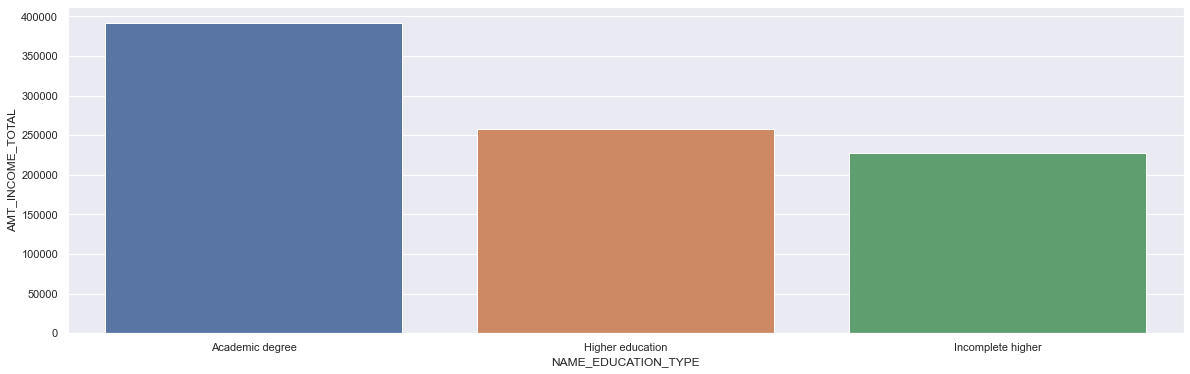

In [163]:
# academic degree adalah edukasi yang mendapat income tertinggi
plt.figure(figsize = (20,6))
sns.barplot(data = top_education, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL')
plt.show()

In [164]:
top_occupation = df.groupby('OCCUPATION_TYPE', as_index=False)['AMT_INCOME_TOTAL'].mean()
top_occupation = top_occupation.sort_values(by='AMT_INCOME_TOTAL', ascending=False).head()
top_occupation

,OCCUPATION_TYPE,AMT_INCOME_TOTAL
10,Managers,309462.561290
7,IT staff,279967.704545
0,Accountants,237239.270053
12,Private service staff,220455.882353
13,Realty agents,219402.439024


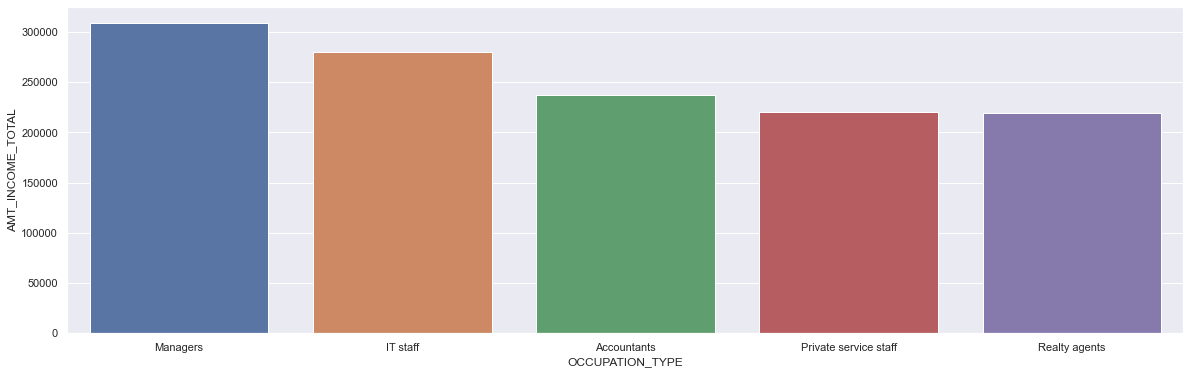

In [165]:
# manager membuat income yang tertinggi
plt.figure(figsize = (20,6))
sns.barplot(data = top_occupation, x = 'OCCUPATION_TYPE', y = 'AMT_INCOME_TOTAL')
plt.show()

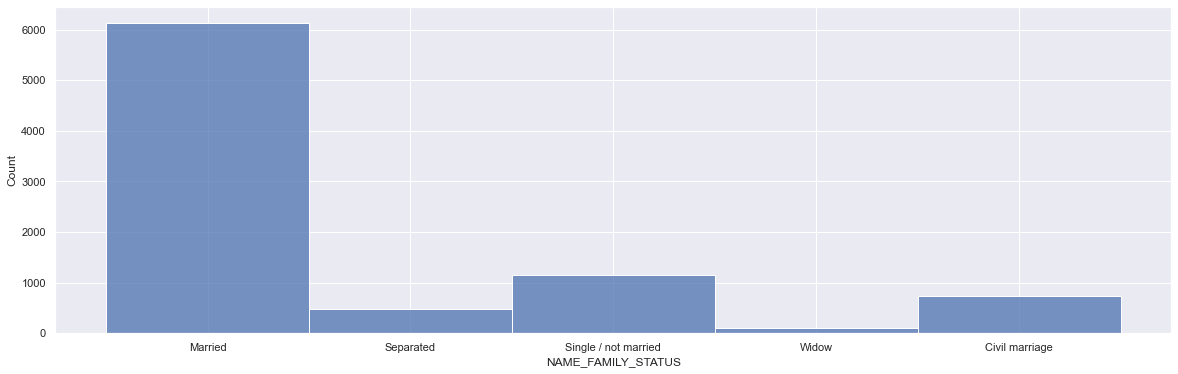

In [167]:
# family status yang paling banyak adalah 'married'
top_fam_status = df['NAME_FAMILY_STATUS']
plt.figure(figsize = (20,6))
sns.histplot(top_fam_status)
plt.show()